In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# 1) Load and Inspect the dataset

bike_df = pd.read_csv("bikeshare.csv")  # Loading the dataset from the same destination as the notebook
bike_df.info()  # Getting data information on all the columns of the dataset 
bike_df.describe()  # getting numerical information for all columns of the dataset such as min-max values, mean, standard deviation, and percentiles

# It is seen that all columns are fully populated (no null values) and that all have the expected Data type, either integers for whole values, or floats for continuous values

# It is seen that for all columns the values lie in a range that would be expect given the description of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       731 non-null    int64  
 1   month        731 non-null    int64  
 2   holiday      731 non-null    int64  
 3   day_of_week  731 non-null    int64  
 4   workingday   731 non-null    int64  
 5   weather      731 non-null    int64  
 6   temp         731 non-null    float64
 7   atemp        731 non-null    float64
 8   humidity     731 non-null    float64
 9   windspeed    731 non-null    float64
 10  count        731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,16.229822,18.885089,62.789357,0.190383,4552.354309
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,11.531101,10.278475,14.242923,0.077679,2021.971365
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,0.000000,0.020000,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,10.000000,52.000000,0.130000,3116.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,16.000000,20.000000,62.670000,0.180000,4575.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.020000,0.230000,6048.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,39.000000,42.000000,97.250000,0.510000,10045.000000


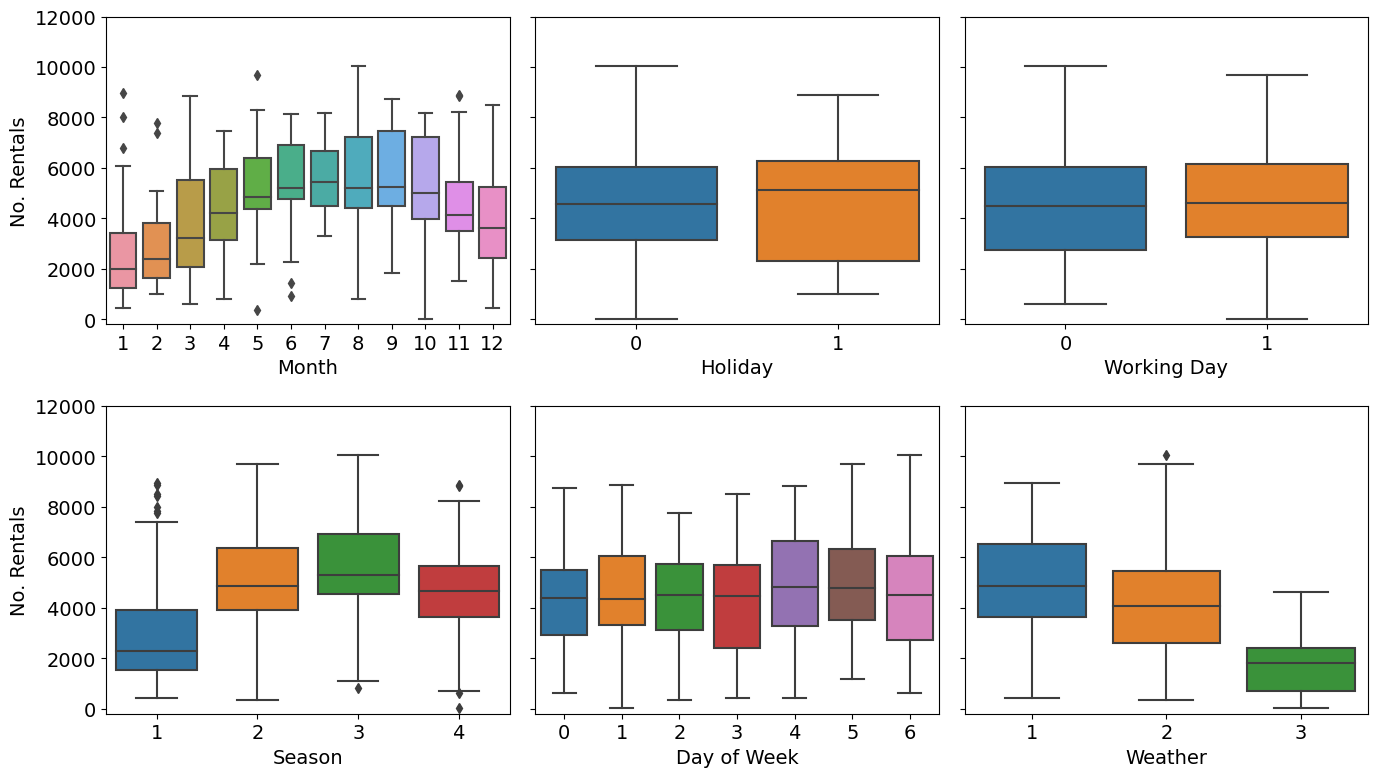

In [5]:
# 2) Perform EDA on the dataset

# As looking to predict total number of bike rentals on a given day initially it makes sense to investigate the relationships between some of the features and count
# Plot boxplots for column with few possible values, scatter plot for continuous variables

plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 3, figsize=(14, 8), dpi = 100, sharey = True)  # Set up a 2x2 grid of subplots with a shared y-axis 

# Box plot of month against count
sns.boxplot(ax = axes[0,0], x = bike_df['month'], y = bike_df['count'])
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('No. Rentals')
axes[0,0].set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000])
axes[0,0].set_ylim((-200, 12000))

# Box plot of season against count
sns.boxplot(ax = axes[1,0], x = bike_df['season'], y = bike_df['count'])
axes[1,0].set_xlabel('Season')
axes[1,0].set_ylabel('No. Rentals')
axes[1,0].set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000])
axes[1,0].set_ylim((-200, 12000))

# Box plot of whether a holiday or not against count
sns.boxplot(ax = axes[0,1], x = bike_df['holiday'], y = bike_df['count'])
axes[0,1].set_xlabel('Holiday')
axes[0,1].set(ylabel = None)

# Box plot of day of the week against count
sns.boxplot(ax = axes[1,1], x = bike_df['day_of_week'], y = bike_df['count'])
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set(ylabel = None)

# Box plot of whether a working day (neither weekend or holiday) against count
sns.boxplot(ax = axes[0,2], x = bike_df['workingday'], y = bike_df['count'])
axes[0,2].set_xlabel('Working Day')
axes[0,2].set(ylabel = None)

# Boxplot of weather against count
sns.boxplot(ax = axes[1,2], x = bike_df['weather'], y = bike_df['count'])
axes[1,2].set_xlabel('Weather')
axes[1,2].set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000])
axes[1,2].set(ylabel = None)


fig.tight_layout()

# See that working day so can remove as feature
# Season is just a greater aggregation of Month - shows same relation just more coarse so don't need to include
# Day of week and Holiday show small effect on count so will include, Month, Weather, and Apparent Temperature show more obvious effect

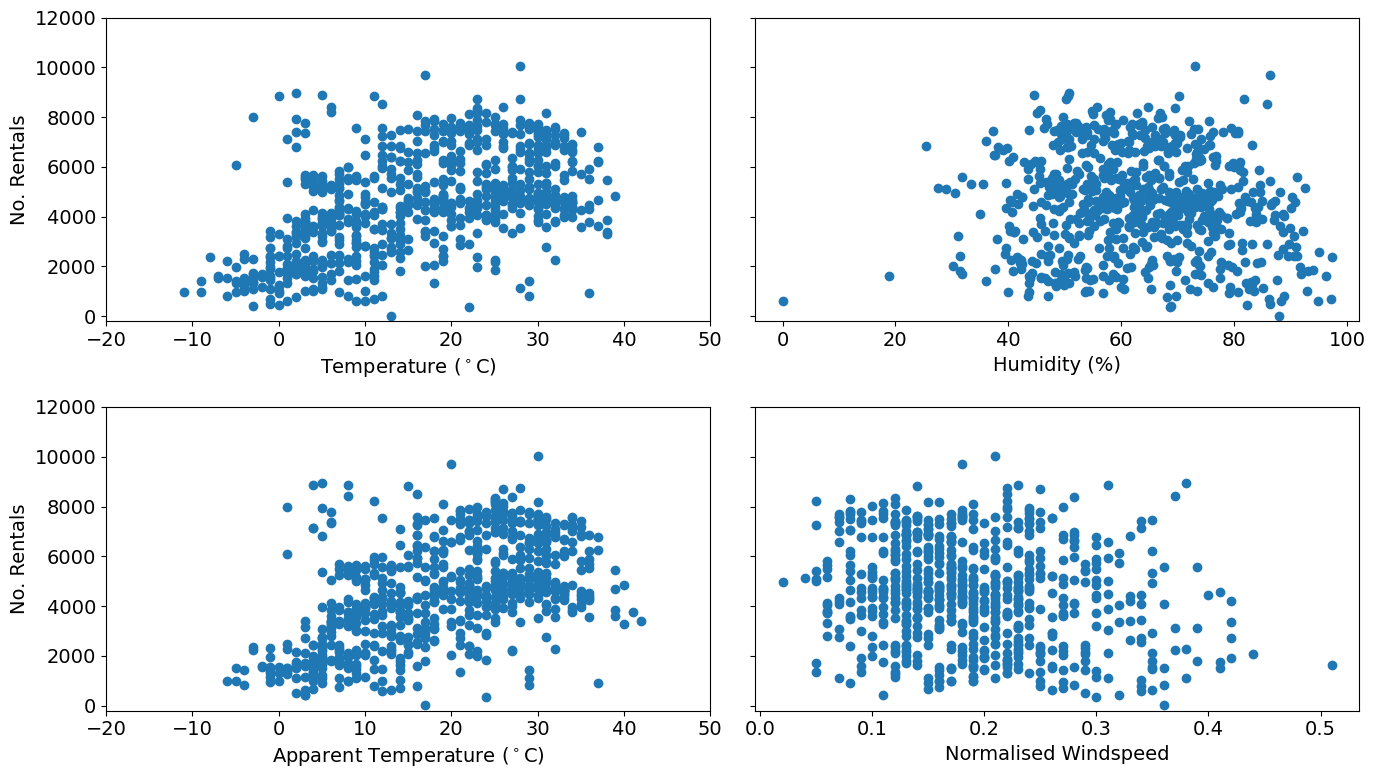

In [6]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi = 100, sharey = True)  # Set up a 2x2 grid of subplots with a shared y-axis 

# Scatter plot of temperatre against count
axes[0,0].scatter(bike_df['temp'], bike_df['count'])
axes[0,0].set_ylabel('No. Rentals')
axes[0,0].set_ylim((-200, 12000))
axes[0,0].set_xticks([-20, -10, -0, 10, 20, 30, 40, 50])
axes[0,0].set_xlabel('Temperature ($^\circ$C)')

# Scatter plot of apparent temperature against count
axes[1,0].scatter(bike_df['atemp'], bike_df['count'])
axes[1,0].set_xticks([-20, -10, -0, 10, 20, 30, 40, 50])
axes[1,0].set_xlabel('Apparent Temperature ($^\circ$C)')
axes[0,0].set_ylim((-200, 12000))
axes[1,0].set_ylabel('No. Rentals')

# Scatter plot of humidity against count
axes[0,1].scatter(bike_df['humidity'], bike_df['count'])
axes[0,1].set_xticks([0, 20, 40, 60, 80, 100])
axes[0,1].set_xlabel('Humidity (%)')

# Scatter plot of windspeed against count
axes[1,1].scatter(bike_df['windspeed'], bike_df['count'])
axes[1,1].set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
axes[1,1].set_xlabel('Normalised Windspeed')

fig.tight_layout()

# See that working day, humidity and windspeed appear to have no effect on count so can remove as features
# Apparent Temperature and Temperature show nearly identical correlation as very closely related - only need to include one - will use Apparent Temperature as looks slightly stronger correlation

In [7]:
# importing and calculating r^2 score for 'temp' and 'atemp'

from sklearn.metrics import r2_score

print("R2 temp atemp: " + str(r2_score(bike_df['temp'], bike_df['atemp'])))

# see that with r^2 score obtained they are very similar and so will contain similar information

R2 temp atemp: 0.9184158224672608


In [8]:
# Splitting the data into train and test groups

feature_names = ['month', 'holiday', 'day_of_week', 'weather', 'atemp']  # Selecting the desired features for the model

X_train, X_test, Y_train, Y_test = train_test_split(bike_df[feature_names], 
                                                    bike_df['count'],
                                                    random_state = 42)  

# Creating the split with the features above as X and count as the Y (response variable), default setting so 75-25 train-test split


print(np.mean(Y_test))   # Calculating mean of bike rentals for test dataset    

4582.103825136612


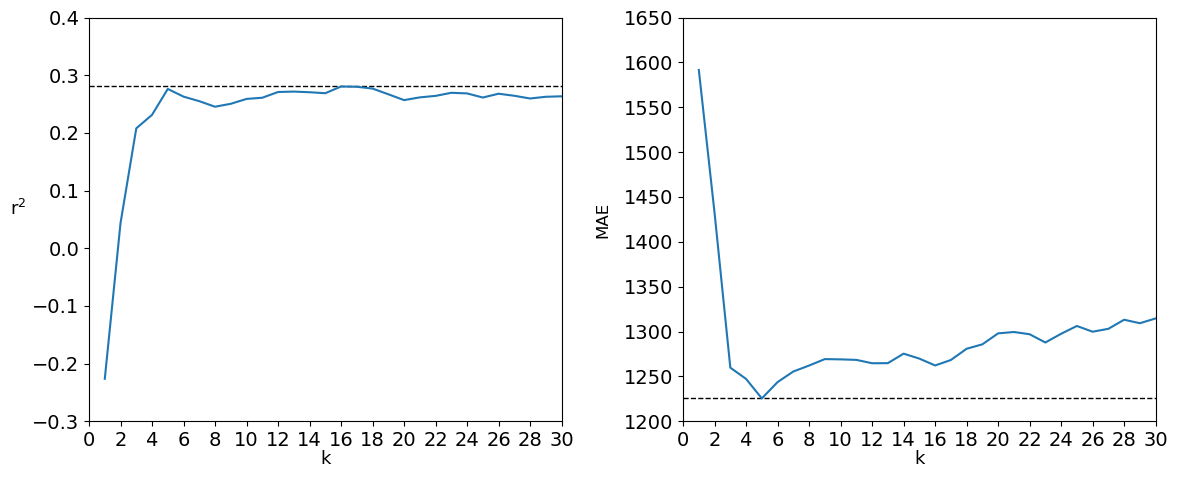

15
0.27614210575045084 0.28039834134760033
1225.4885245901642 1262.2042349726776


In [9]:
# Building and training KNeighborsRegressor model

# Importing KNR and MAE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Arrays to store the predictions, r^2 and MAE values for each value of k - chose 1-0
KNR_prediction = np.zeros((30, len(Y_test)))
KNR_r2 = np.zeros(30)
KNR_mae = np.zeros(30)

# for loop to iterate over k = 1 to k = 20
for i in np.arange(1, 31, 1):

    KNR_model = KNeighborsRegressor(n_neighbors = i)  # creating an instance of the model with k = i

    KNR_model.fit(X_train, Y_train)  # Fitting the model on the training data
    
    KNR_prediction[i-1] = KNR_model.predict(X_test)  # predicitng count and populating relevant row of array - use i-1 as start with k = i = 1 but first value in array has index 0

    KNR_r2[i-1] = r2_score(Y_test, KNR_prediction[i-1])  # calculating the r^2 for the given value of k and storing in array similar to prediction
    KNR_mae[i-1] = mean_absolute_error(Y_test, KNR_prediction[i-1])  # calculating the MAE for the given value of k and storing in array similar to prediction
    
    
# Plotting r^2 for each value of k to find optimal value of k - the one that maximises r^2    
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi = 100)  
axes[0].plot(np.arange(1, 31, 1), KNR_r2, zorder = 2)
axes[0].set_xticks(np.arange(0, 32, 2))
axes[0].set_xlim(0, 30)
axes[0].plot([0, 30],[max(KNR_r2), max(KNR_r2)], linestyle = '--', color = 'black', linewidth = 1, zorder = 1)
axes[0].set_xlabel('k', fontsize = 13, labelpad = 0)
axes[0].set_yticks(np.arange(-0.3, 0.5, 0.1))
axes[0].set_ylim(-0.3, 0.4)
axes[0].set_ylabel('r$^2$', fontsize = 13, rotation = 0, labelpad = 10)

# Plotting MAE for each value of k to find optimal value of k - the one that minimises MAE 
axes[1].plot(np.arange(1, 31, 1), KNR_mae, zorder = 2)
axes[1].set_xticks(np.arange(0, 32, 2))
axes[1].set_xlim(0, 30)
axes[1].plot([0, 30], [min(KNR_mae), min(KNR_mae)], linestyle = '--', color = 'black', linewidth = 1, zorder = 1)
axes[1].set_xlabel('k', fontsize = 13, labelpad = 0)
axes[1].set_yticks(np.arange(1200, 1700, 50))
axes[1].set_ylim(1200, 1650)
axes[1].set_ylabel('MAE', fontsize = 12, rotation = 90, labelpad = 10)

plt.tight_layout()
plt.show()

print(np.argmax(KNR_r2))
print(KNR_r2[4], KNR_r2[15])
print(KNR_mae[4], KNR_mae[15])

# Find that r^2 is maximised for k = 16, but MAE minimies for k = 5 which has very close r^2 so probably best

In [12]:
# Building and training Linear Regression model

from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)  # training the model
LR_prediction = LR_model.predict(X_test)  # making predictions with the model

LR_r2 = r2_score(Y_test, LR_prediction)  # calculating r^2 for the model
LR_mae = mean_absolute_error(Y_test, LR_prediction)  # calculating MAE for the model

print(LR_r2, LR_mae)

# LR performs worse in both metrics than KNR

0.2718951792373997 1280.3558613648377


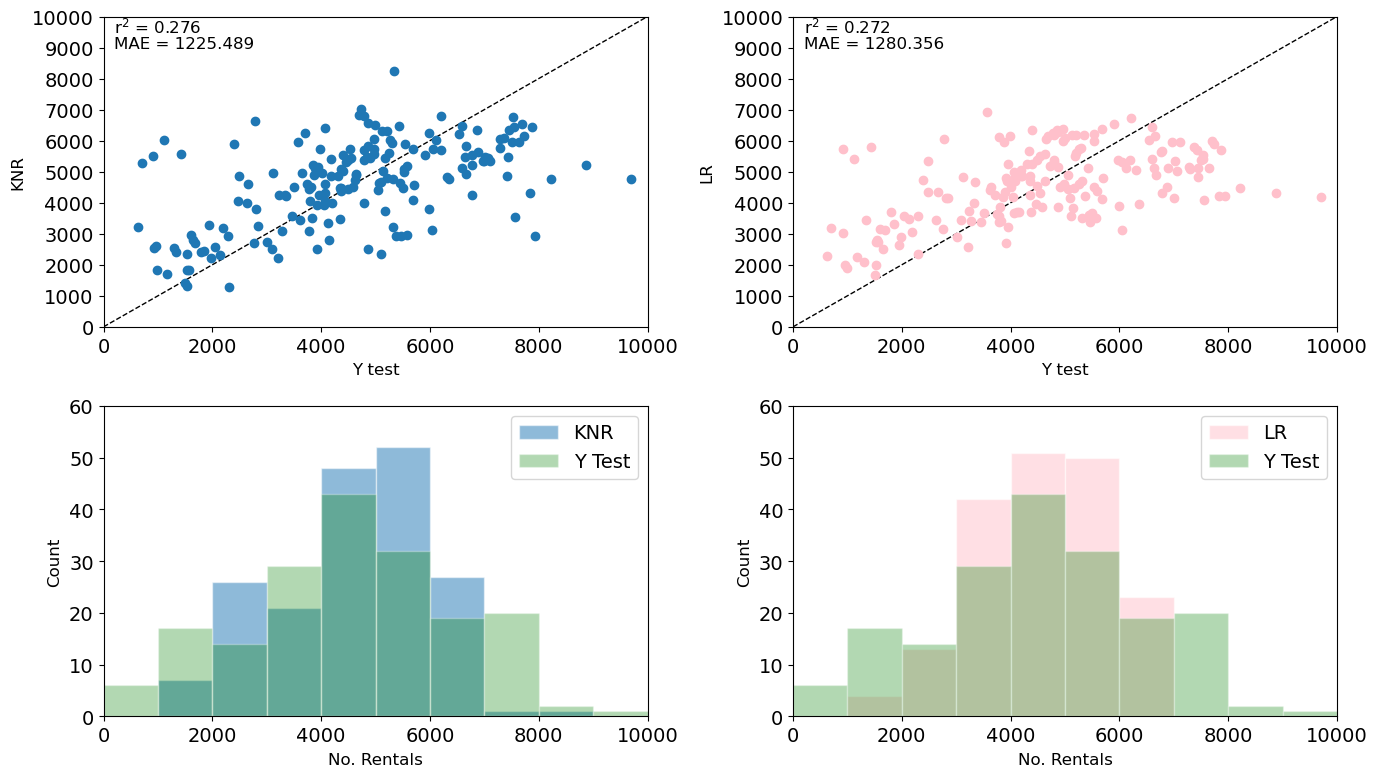

In [13]:
# Plotting predicted values against actual values to see which model performs best


fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi = 100)

# Plotting scatter plot of KNR model with k = 5 predictions vs Y_test values
axes[0, 0].plot([0, 10000], [0, 10000], linestyle = '--', color = 'black', linewidth = 1, zorder = 1)
axes[0, 0].scatter(Y_test, KNR_prediction[4], zorder = 2)  # k = 5 has 4th index as k starts from 1, index from 0
axes[0, 0].set_xticks(np.arange(0, 11000, 2000))
axes[0, 0].set_xlim(0, 10000)
axes[0, 0].set_xlabel('Y test', fontsize = 12, labelpad = 5)
axes[0, 0].set_yticks(np.arange(0, 11000, 1000))
axes[0, 0].set_ylim(0, 10000)
axes[0, 0].set_ylabel('KNR', fontsize = 12, labelpad = 5)
axes[0, 0].annotate('r$^2$ = {0:.3f}'.format(KNR_r2[4]), xy = (200, 9500), fontsize = 12)
axes[0, 0].annotate('MAE = {0:.3f}'.format(KNR_mae[4]), xy = (200, 9000), fontsize = 12)

# Plotting scatter plot of LR model predictions vs Y_test values
axes[0, 1].plot([0, 10000], [0, 10000], linestyle = '--', color = 'black', linewidth = 1, zorder = 1)
axes[0, 1].scatter(Y_test, LR_prediction, color = 'pink', zorder = 2)
axes[0, 1].set_xticks(np.arange(0, 11000, 2000))
axes[0, 1].set_xlim(0, 10000)
axes[0, 1].set_xlabel('Y test', fontsize = 12, labelpad = 5)
axes[0, 1].set_yticks(np.arange(0, 11000, 1000))
axes[0, 1].set_ylim(0, 10000)
axes[0, 1].set_ylabel('LR', fontsize = 12, labelpad = 5)
axes[0, 1].annotate('r$^2$ = {0:.3f}'.format(LR_r2), xy = (200, 9500), fontsize = 12)
axes[0, 1].annotate('MAE = {0:.3f}'.format(LR_mae), xy = (200, 9000), fontsize = 12)

# Plotting histogram of KNR model with k = 5 predictions vs Y_test values
axes[1, 0].hist(KNR_prediction[4], bins = np.arange(0, 11000, 1000), edgecolor = 'white', alpha = 0.5, label = 'KNR')
axes[1, 0].hist(Y_test, bins = np.arange(0, 11000, 1000), color = 'green', edgecolor = 'white', alpha = 0.3, label = 'Y Test')
axes[1, 0].legend()
axes[1, 0].set_xticks(np.arange(0, 11000, 2000))
axes[1, 0].set_xlim(0, 10000)
axes[1, 0].set_xlabel('No. Rentals', fontsize = 12, labelpad = 5)
axes[1, 0].set_yticks(np.arange(0, 70, 10))
axes[1, 0].set_ylim(0, 60)
axes[1, 0].set_ylabel('Count', fontsize = 12, labelpad = 5)

# Plotting histogram of MAE model predictions vs Y_test values
axes[1, 1].hist(LR_prediction, bins = np.arange(0, 11000, 1000), color = 'pink', edgecolor = 'white', alpha = 0.5, label = 'LR')
axes[1, 1].hist(Y_test, alpha = 0.3, bins = np.arange(0, 11000, 1000), color = 'green', edgecolor = 'white', label = 'Y Test')
axes[1, 1].legend()
axes[1, 1].set_xticks(np.arange(0, 11000, 2000))
axes[1, 1].set_xlim(0, 10000)
axes[1, 1].set_xlabel('No. Rentals', fontsize = 12, labelpad = 5)
axes[1, 1].set_yticks(np.arange(0, 70, 10))
axes[1, 1].set_ylim(0, 60)
axes[1, 1].set_ylabel('Count', fontsize = 12, labelpad = 5)

plt.tight_layout()
plt.show()

# KNR performs slightly better, but neither is exceptional
# LR more consistent prediction and more symmetric distribution - both narrower distributions than actual bike rentals